### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 15dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/120619/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream15deg_wind_speeds.csv'],
 ['Bent_cylinder_L100_upstream15deg_wind_speeds.csv',
  'Bent_cylinder_L100_upstream15deg_y0.csv',
  'Bent_cylinder_L100_upstream15deg_y1.csv',
  'Bent_cylinder_L100_upstream15deg_y10.csv',
  'Bent_cylinder_L100_upstream15deg_y2.csv',
  'Bent_cylinder_L100_upstream15deg_y3.csv',
  'Bent_cylinder_L100_upstream15deg_y4.csv',
  'Bent_cylinder_L100_upstream15deg_y5.csv',
  'Bent_cylinder_L100_upstream15deg_y6.csv',
  'Bent_cylinder_L100_upstream15deg_y7.csv',
  'Bent_cylinder_L100_upstream15deg_y8.csv',
  'Bent_cylinder_L100_upstream15deg_y9.csv',
  'Bent_cylinder_L100_upstream15deg_yminus1.csv',
  'Bent_cylinder_L100_upstream15deg_yminus2.csv'])

#### Velocidades UpStream

In [5]:
velocity = pd.read_csv(path_mat + ustream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00107   
1        0.00007          0.0              0.0  0.0         inf    0.00108   
2        0.00007          0.0              0.0  0.0         inf    0.00106   
3        0.00007          0.0              0.0  0.0         inf    0.00106   
4        0.00007          0.0              0.0  0.0         inf    0.00107   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.69994   1.07956  101058.0  20.0          0.0         inf   
1         inf   1.61385   1.63926  101058.0  20.0          0.0         inf   
2         inf   4.53370   2.74753  101058.0  20.0          0.0         inf   
3         inf   8.89337   3.84812  101058.0  20.0          0.0         inf   
4         inf  14.13650   4.85162  101058.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00109         inf  
1    0.00110         inf  
2    0.00107         inf  
3    0.00108         inf  
4    0.00108         inf

In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.520084
std      4.265889
min      0.883345
25%      3.966580
50%      7.470980
75%     11.033165
max     14.514381

In [7]:
df_prueba = pd.read_csv(path_mat + ustream[1])
df_prueba.describe()

0.78685
count  1.599999e+06
mean   8.019447e+00
std    4.576187e+00
min    6.625900e-01
25%    3.895930e+00
50%    8.041800e+00
75%    1.201240e+01
max    1.903063e+01

## Graficas Upstream

## y-2

Velocity:  0.927126128
Max Frequency value:  78.125


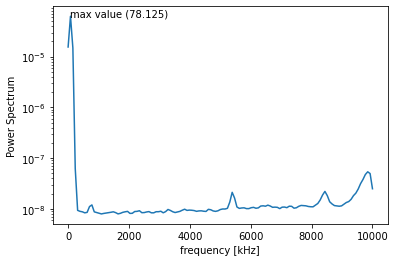


Velocity:  1.407796488
Max Frequency value:  78.125


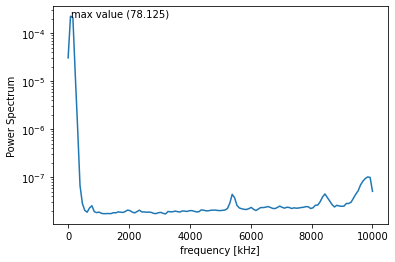


Velocity:  2.3595787639999997
Max Frequency value:  234.375


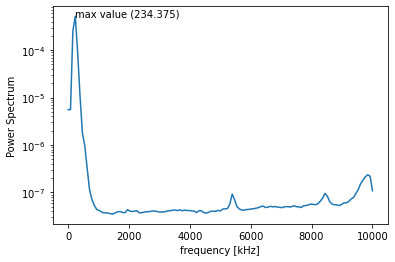


Velocity:  3.3047654559999997
Max Frequency value:  390.625


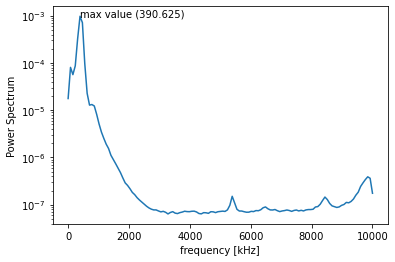


Velocity:  4.166571256
Max Frequency value:  546.875


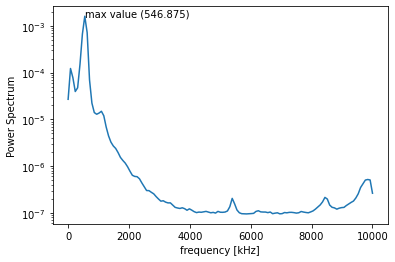


Velocity:  5.163586528
Max Frequency value:  703.125


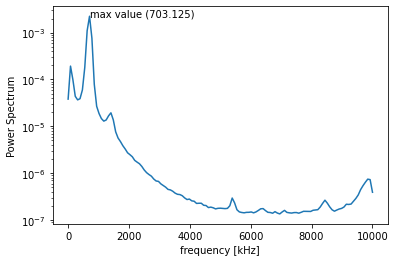


Velocity:  6.092945536
Max Frequency value:  859.375


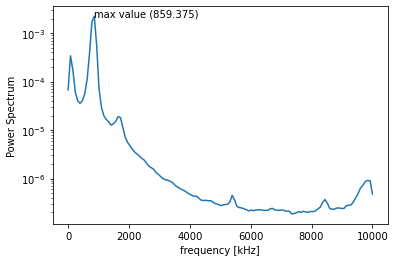


Velocity:  7.09205628
Max Frequency value:  1015.625


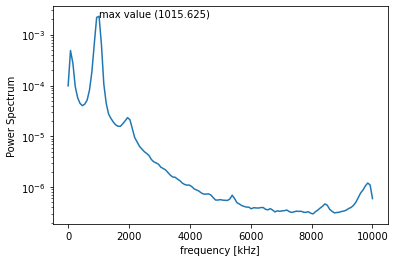


Velocity:  7.909608116
Max Frequency value:  1093.75


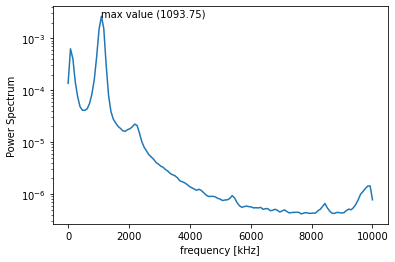


Velocity:  8.859157512
Max Frequency value:  1250.0


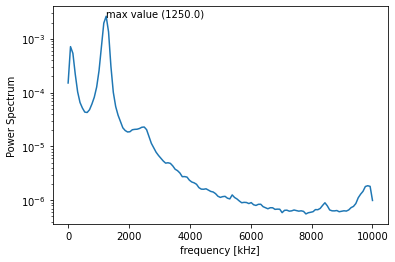


Velocity:  9.798641772
Max Frequency value:  1328.125


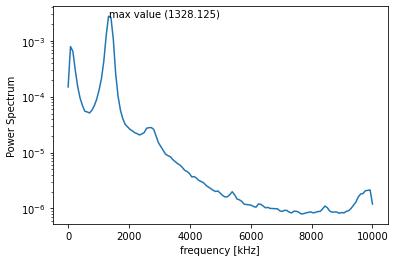


Velocity:  10.809767128
Max Frequency value:  1484.375


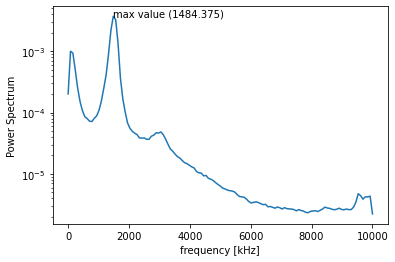


Velocity:  11.740457276
Max Frequency value:  1640.625


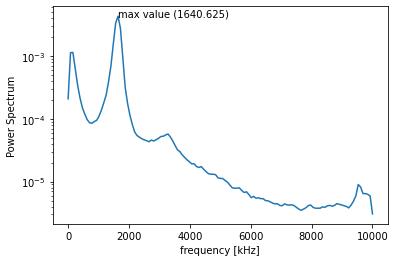


Velocity:  12.671327772
Max Frequency value:  1718.75


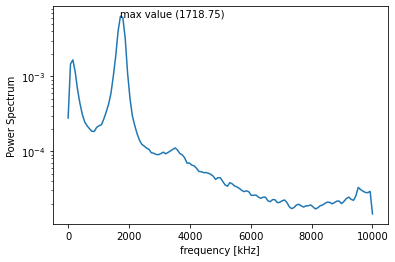


Velocity:  13.613792068
Max Frequency value:  1875.0


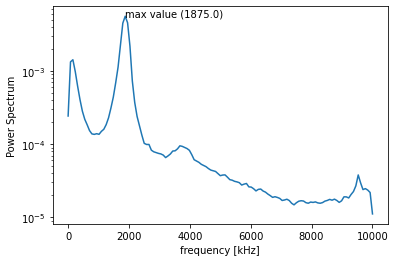


Velocity:  14.439167571999999
Max Frequency value:  1953.125


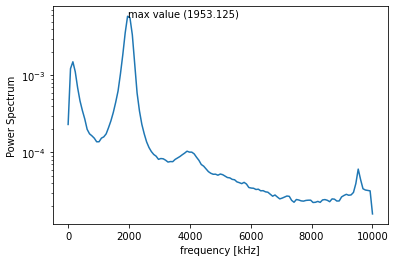

In [8]:
df = pd.read_csv(path_mat + ustream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

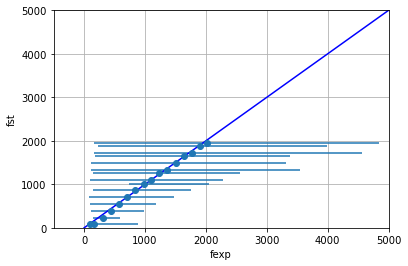

In [9]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  1.038692836
Max Frequency value:  9843.75


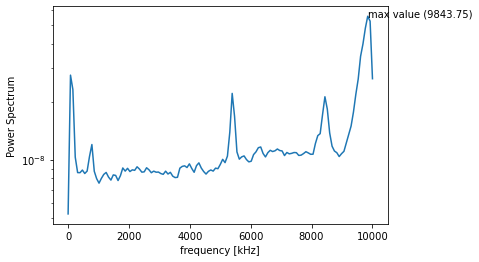


Velocity:  1.405323144
Max Frequency value:  78.125


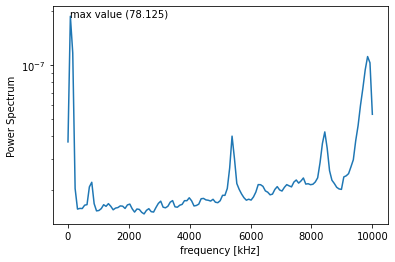


Velocity:  2.326222972
Max Frequency value:  78.125


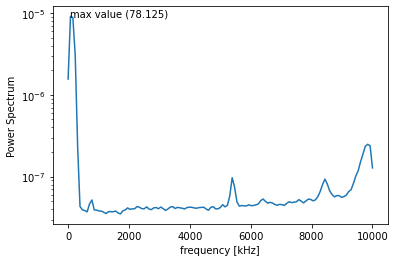


Velocity:  3.305830368
Max Frequency value:  312.5


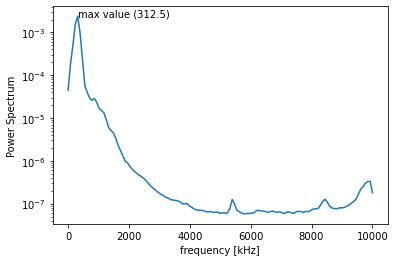


Velocity:  4.264337048
Max Frequency value:  390.625


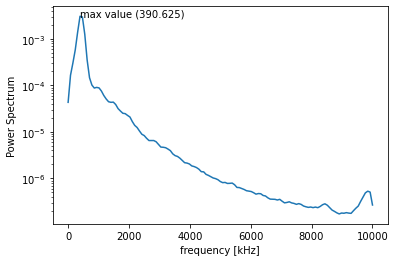


Velocity:  5.158090208
Max Frequency value:  546.875


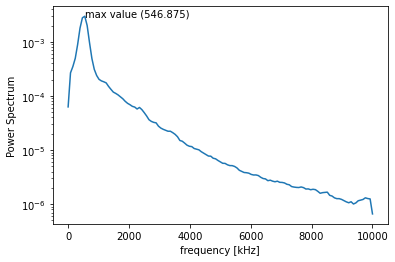


Velocity:  6.125296531999999
Max Frequency value:  625.0


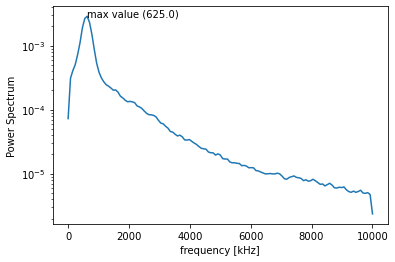


Velocity:  7.054861651999999
Max Frequency value:  703.125


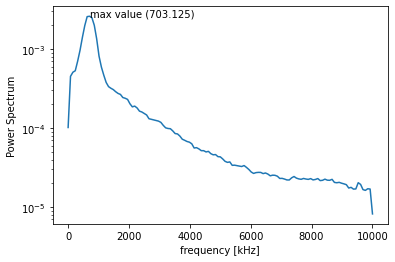


Velocity:  7.907289356
Max Frequency value:  703.125


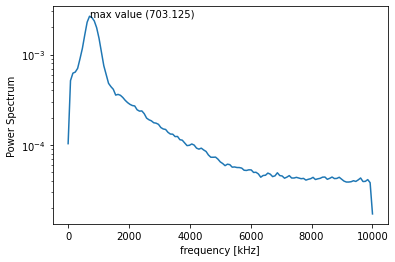


Velocity:  8.919943375999999
Max Frequency value:  859.375


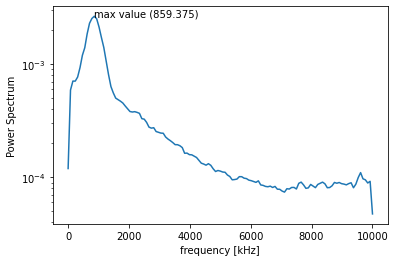


Velocity:  9.824766468
Max Frequency value:  937.5


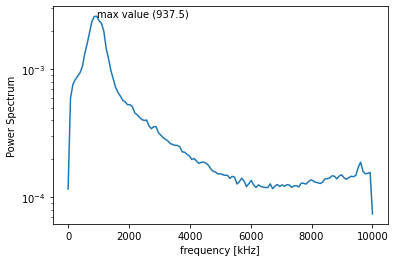


Velocity:  10.71013774
Max Frequency value:  937.5


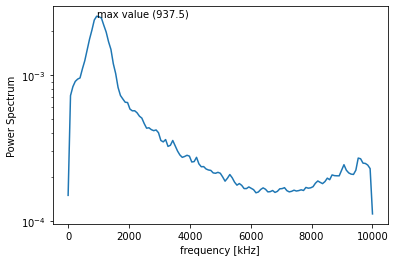


Velocity:  11.699827448
Max Frequency value:  1093.75


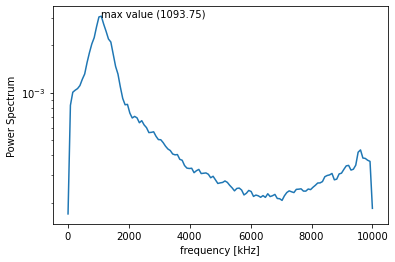


Velocity:  12.641587528
Max Frequency value:  1250.0


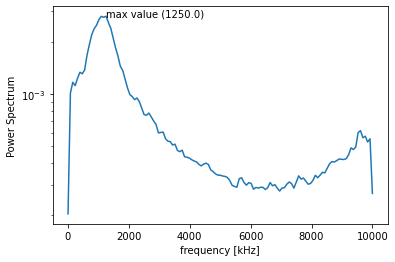


Velocity:  13.601047476000002
Max Frequency value:  1171.875


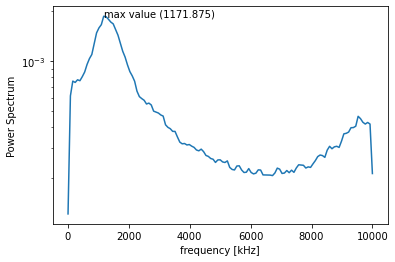


Velocity:  14.384273076000003
Max Frequency value:  1328.125


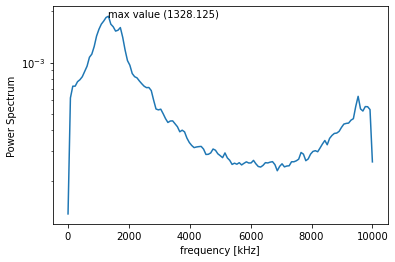

In [10]:
df1 = pd.read_csv(path_mat + ustream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

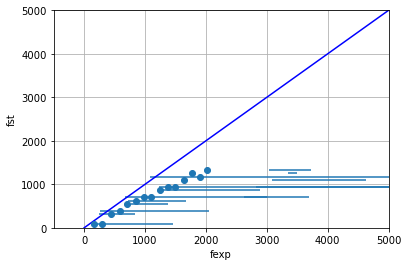

In [11]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.918409308
Max Frequency value:  9843.75


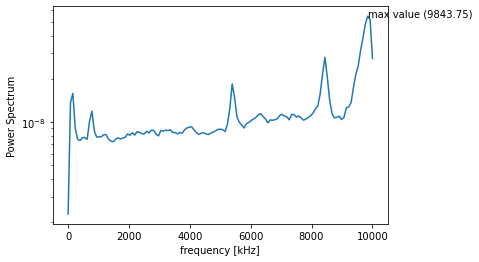


Velocity:  1.388198672
Max Frequency value:  9843.75


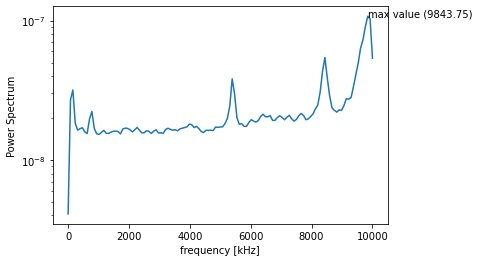


Velocity:  2.359819228
Max Frequency value:  9843.75


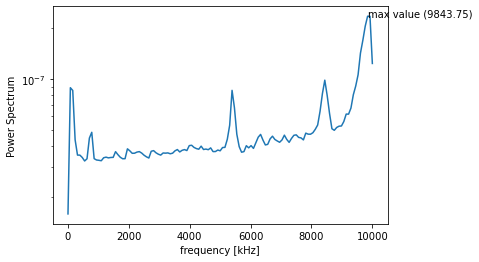


Velocity:  3.3124603040000005
Max Frequency value:  312.5


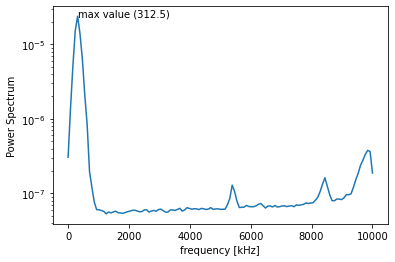


Velocity:  4.186821760000001
Max Frequency value:  468.75


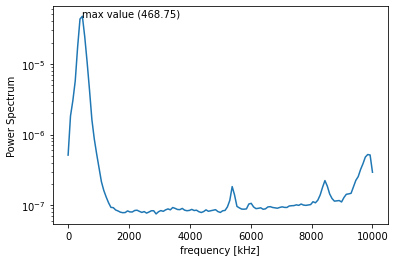


Velocity:  5.201141852
Max Frequency value:  625.0


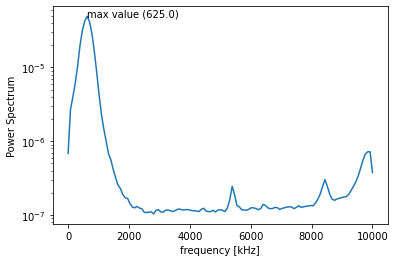


Velocity:  6.1087045159999995
Max Frequency value:  781.25


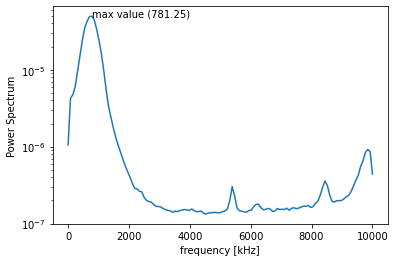


Velocity:  7.030660668
Max Frequency value:  859.375


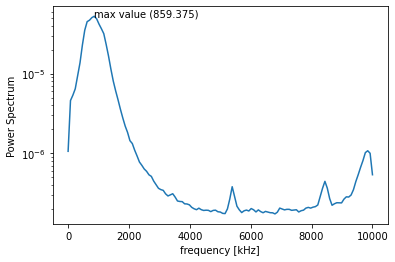


Velocity:  7.906353264
Max Frequency value:  859.375


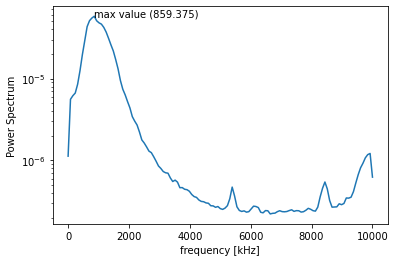


Velocity:  8.855499024
Max Frequency value:  1015.625


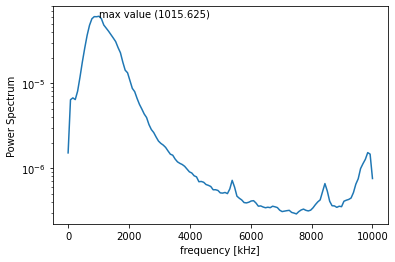


Velocity:  9.81183294
Max Frequency value:  1015.625


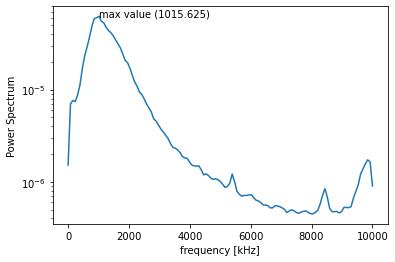


Velocity:  10.79700536
Max Frequency value:  1015.625


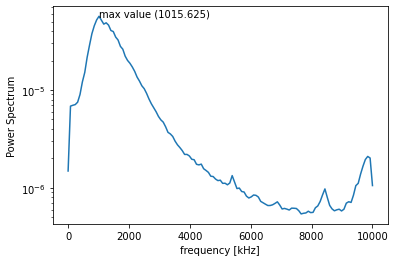


Velocity:  11.693669852
Max Frequency value:  1171.875


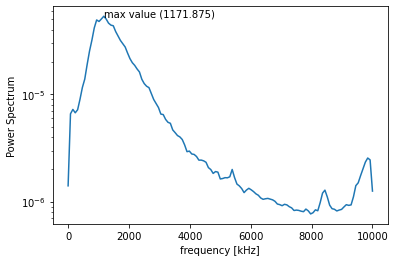


Velocity:  12.660163372
Max Frequency value:  1171.875


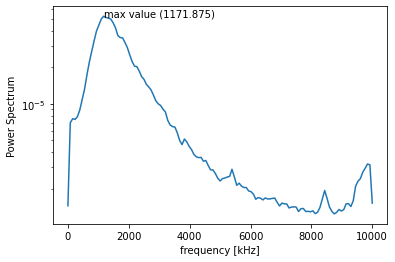


Velocity:  13.673186676000002
Max Frequency value:  1250.0


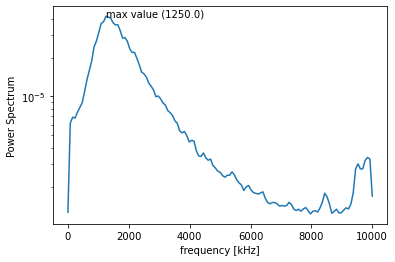


Velocity:  14.455484772
Max Frequency value:  1093.75


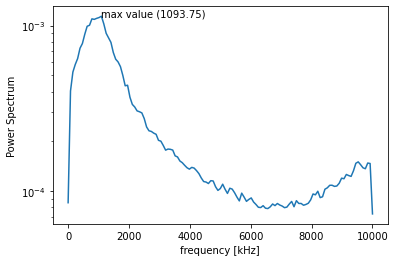

In [12]:
df2 = pd.read_csv(path_mat + ustream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

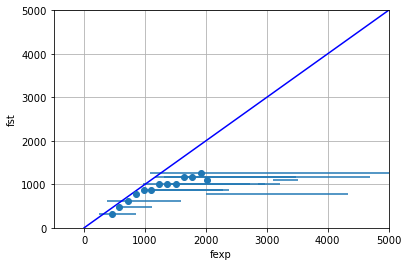

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.9663647000000001
Max Frequency value:  9843.75


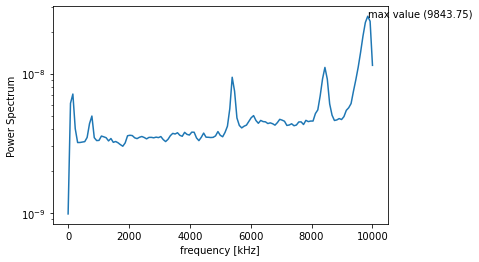


Velocity:  1.4139283200000001
Max Frequency value:  9843.75


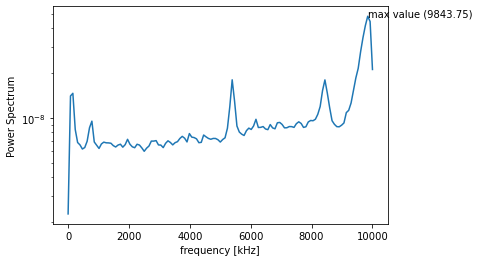


Velocity:  2.3221608479999998
Max Frequency value:  78.125


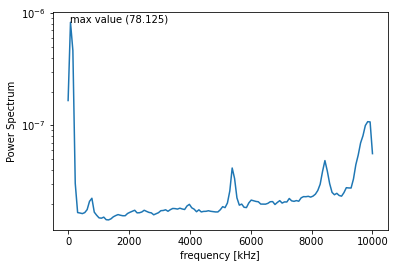


Velocity:  3.2531344
Max Frequency value:  234.375


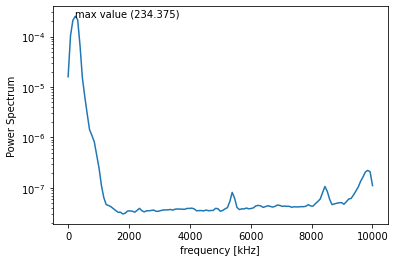


Velocity:  4.194516608
Max Frequency value:  390.625


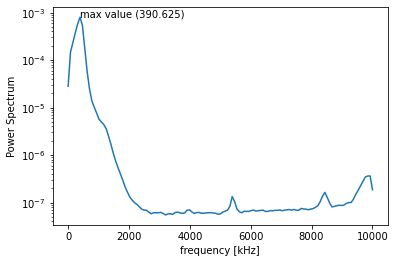


Velocity:  5.206749815999999
Max Frequency value:  390.625


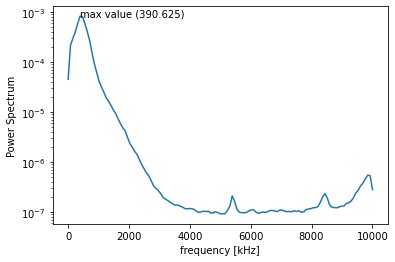


Velocity:  6.122788836
Max Frequency value:  468.75


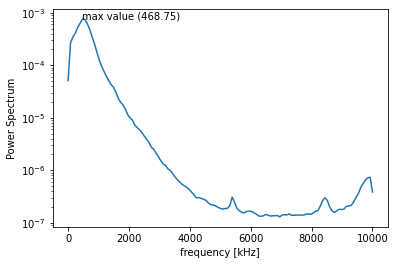


Velocity:  7.049485563999999
Max Frequency value:  546.875


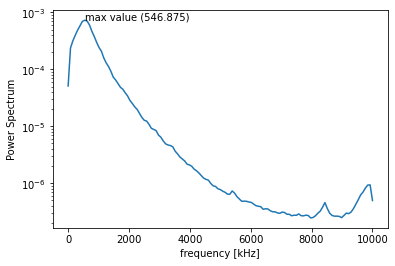


Velocity:  7.932632544000001
Max Frequency value:  625.0


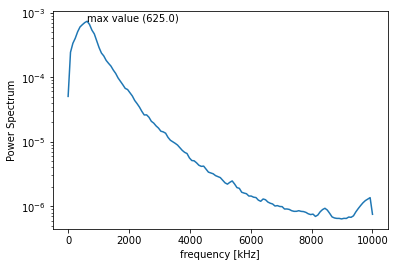


Velocity:  8.911243731999999
Max Frequency value:  625.0


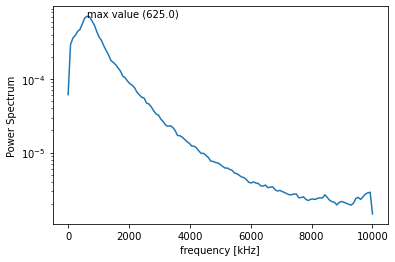


Velocity:  9.835982396
Max Frequency value:  781.25


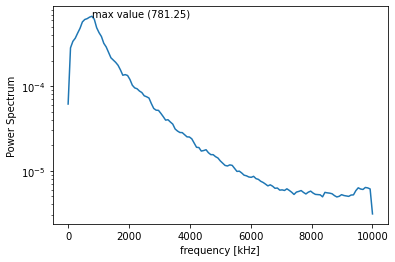


Velocity:  10.798405204000002
Max Frequency value:  703.125


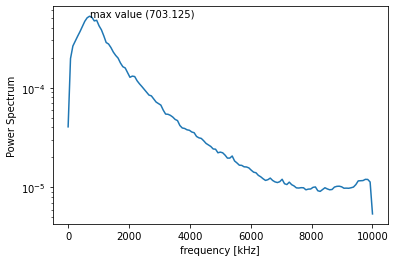


Velocity:  11.677395592
Max Frequency value:  703.125


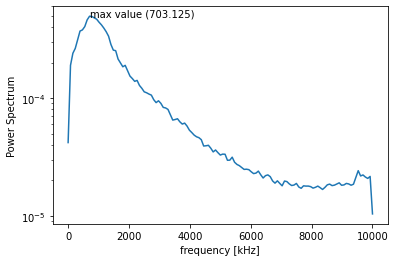


Velocity:  12.709106384
Max Frequency value:  859.375


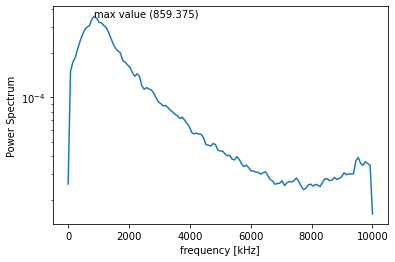


Velocity:  13.554646512
Max Frequency value:  1093.75


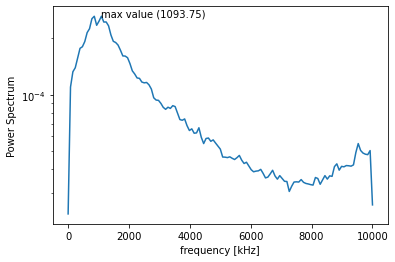


Velocity:  14.459117496000001
Max Frequency value:  1250.0


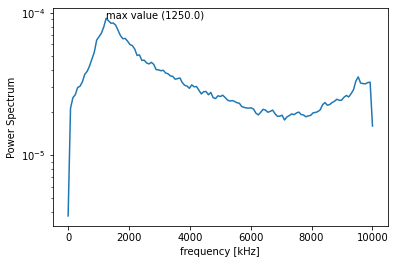

In [14]:
df3 = pd.read_csv(path_mat + ustream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

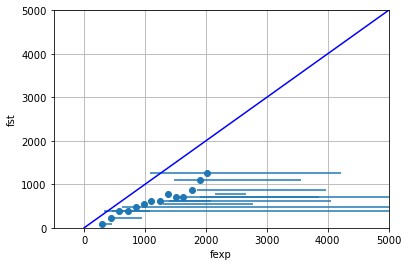

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.8979097519999999
Max Frequency value:  9921.875


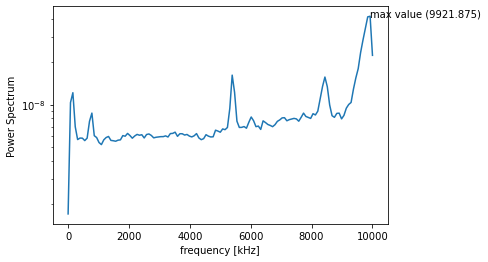


Velocity:  1.43015964
Max Frequency value:  9843.75


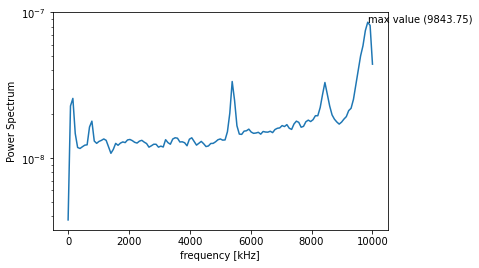


Velocity:  2.3009570760000004
Max Frequency value:  9843.75


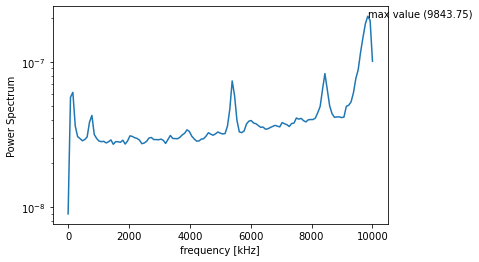


Velocity:  3.2595582240000005
Max Frequency value:  546.875


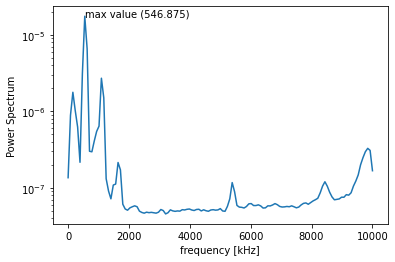


Velocity:  4.223260644
Max Frequency value:  859.375


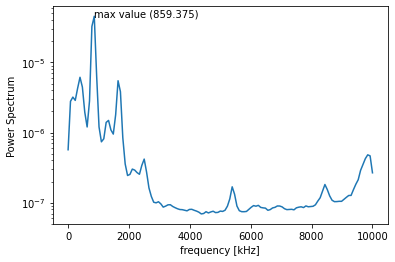


Velocity:  5.171753716
Max Frequency value:  468.75


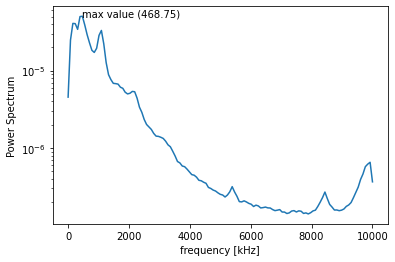


Velocity:  6.067567995999999
Max Frequency value:  468.75


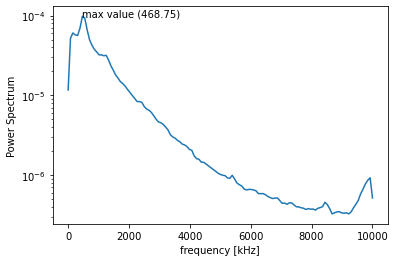


Velocity:  7.007043668000001
Max Frequency value:  625.0


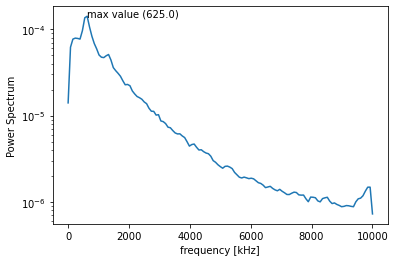


Velocity:  7.892208828000001
Max Frequency value:  703.125


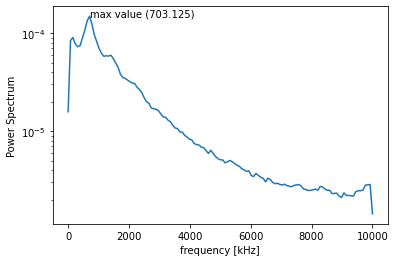


Velocity:  8.868604311999999
Max Frequency value:  781.25


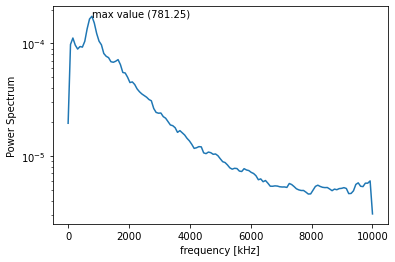


Velocity:  9.861282644000001
Max Frequency value:  859.375


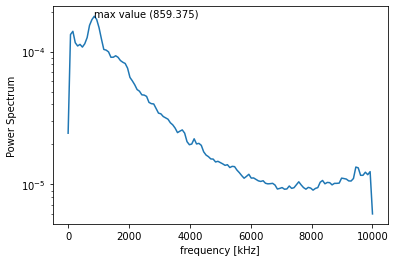


Velocity:  10.713031896
Max Frequency value:  937.5


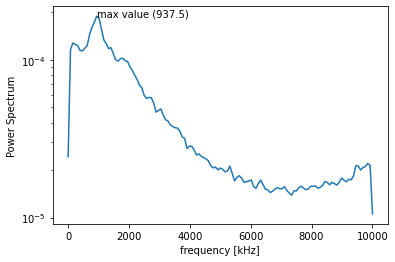


Velocity:  11.677713348000001
Max Frequency value:  1093.75


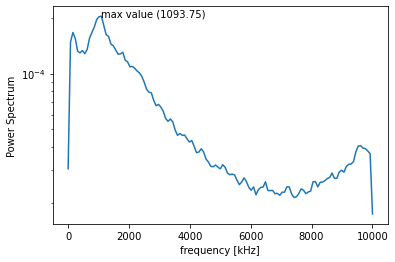


Velocity:  12.590600572
Max Frequency value:  1015.625


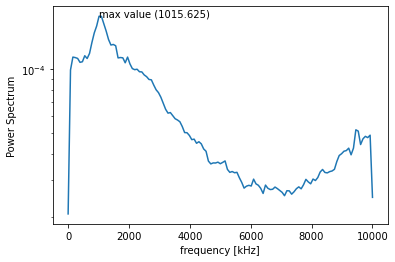


Velocity:  13.514703724
Max Frequency value:  1093.75


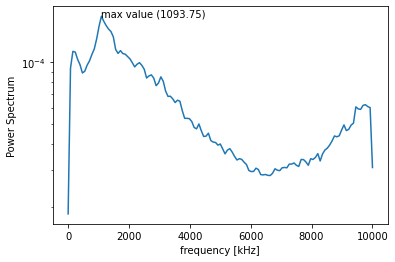


Velocity:  14.478543552
Max Frequency value:  1093.75


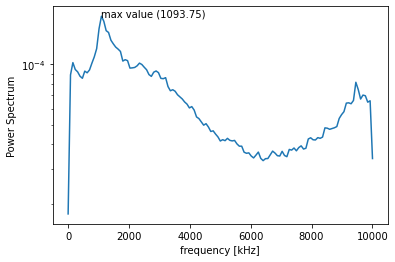

In [16]:
df4 = pd.read_csv(path_mat + ustream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

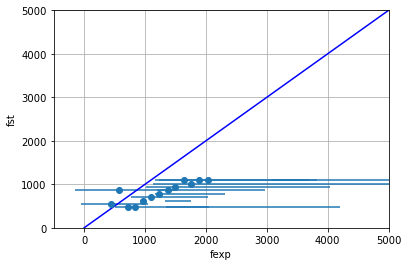

In [17]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  1.0387357760000002
Max Frequency value:  9843.75


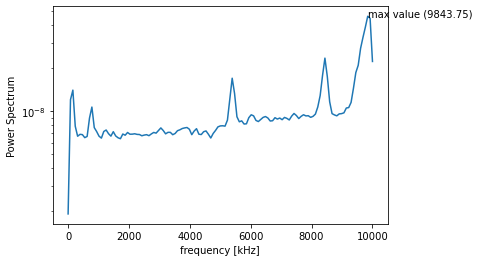


Velocity:  1.391479288
Max Frequency value:  9921.875


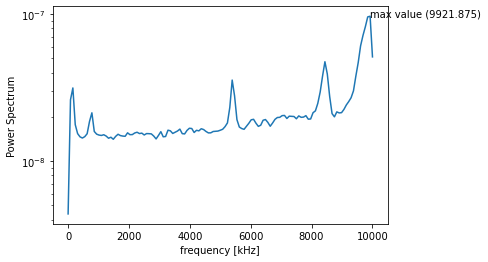


Velocity:  2.324282084
Max Frequency value:  9921.875


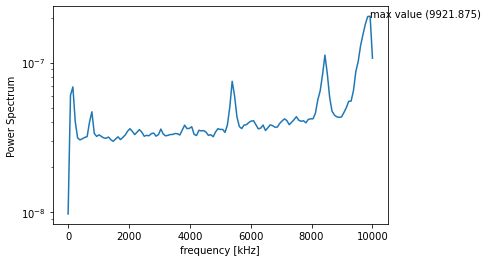


Velocity:  3.366607644
Max Frequency value:  312.5


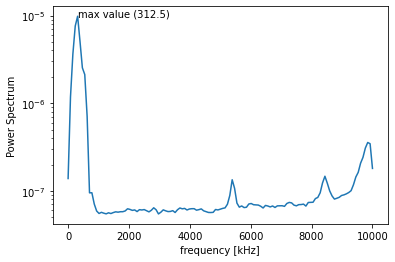


Velocity:  4.264182464
Max Frequency value:  468.75


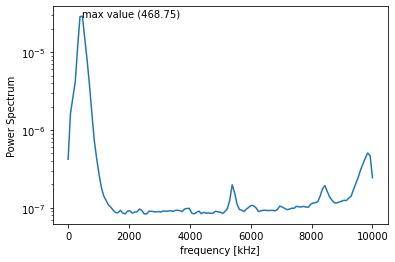


Velocity:  5.166901496
Max Frequency value:  546.875


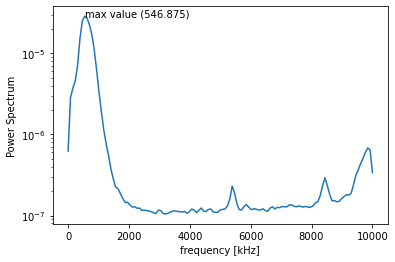


Velocity:  6.093117296
Max Frequency value:  625.0


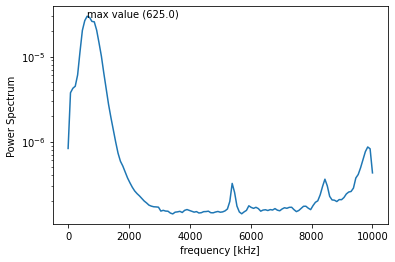


Velocity:  7.024477308000001
Max Frequency value:  859.375


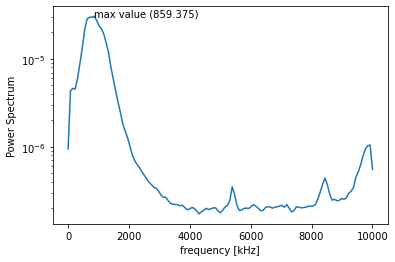


Velocity:  7.8799709280000005
Max Frequency value:  781.25


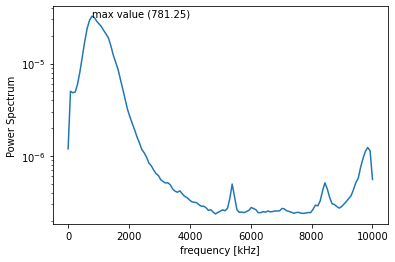


Velocity:  8.887128628000001
Max Frequency value:  859.375


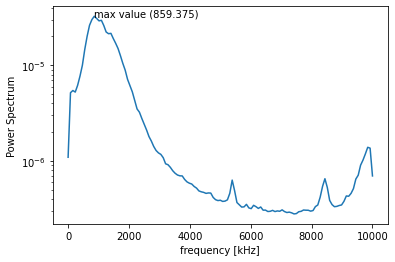


Velocity:  9.753640652
Max Frequency value:  937.5


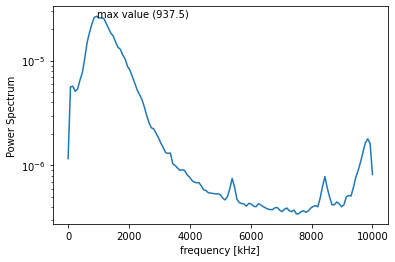


Velocity:  10.695435084
Max Frequency value:  156.25


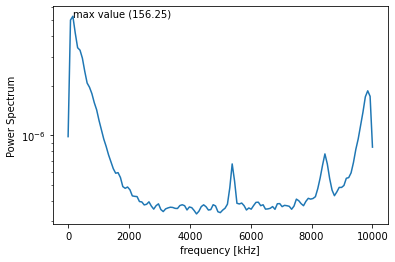


Velocity:  11.812149900000001
Max Frequency value:  625.0


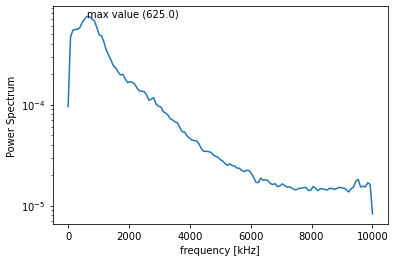


Velocity:  12.620435284
Max Frequency value:  781.25


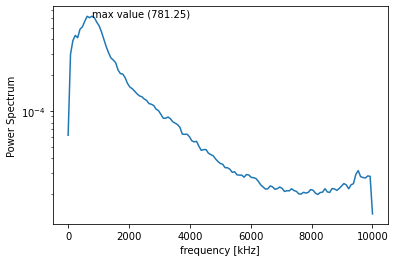


Velocity:  13.602206856
Max Frequency value:  703.125


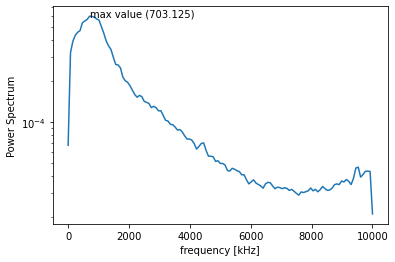


Velocity:  14.514381276000002
Max Frequency value:  859.375


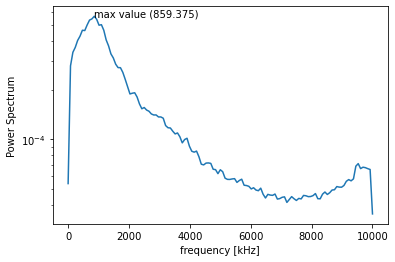

In [18]:
df5 = pd.read_csv(path_mat + ustream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

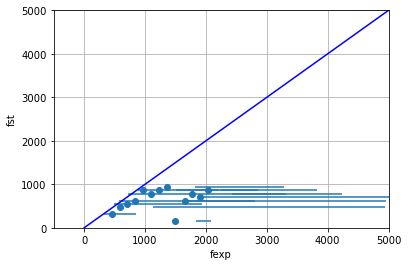

In [19]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  1.03094646
Max Frequency value:  9843.75


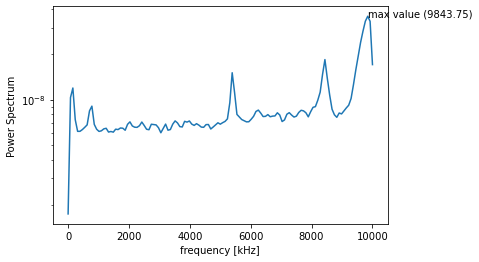


Velocity:  1.36244326
Max Frequency value:  9921.875


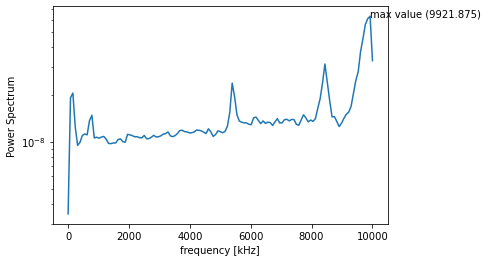


Velocity:  2.370399644
Max Frequency value:  78.125


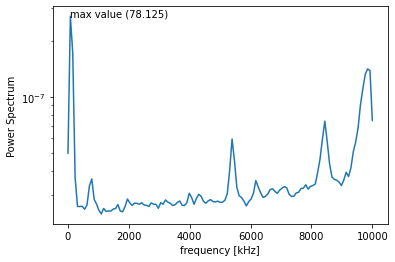


Velocity:  3.320172328
Max Frequency value:  156.25


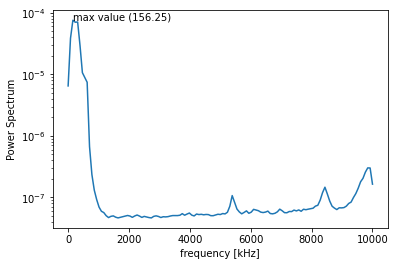


Velocity:  4.182768224
Max Frequency value:  390.625


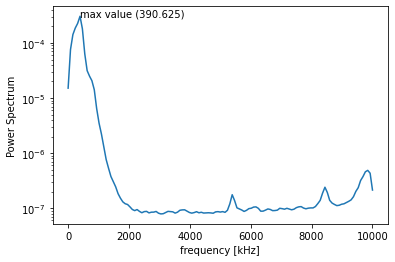


Velocity:  5.189324764
Max Frequency value:  234.375


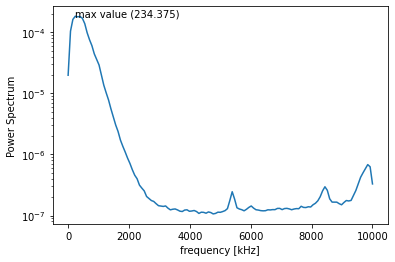


Velocity:  6.124729724
Max Frequency value:  468.75


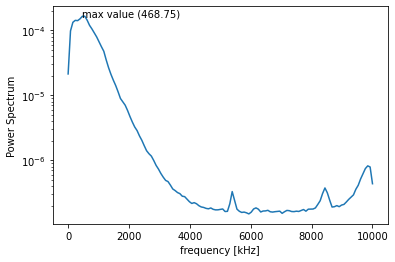


Velocity:  7.000147504
Max Frequency value:  546.875


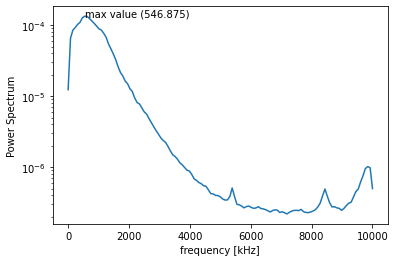


Velocity:  7.894553351999999
Max Frequency value:  625.0


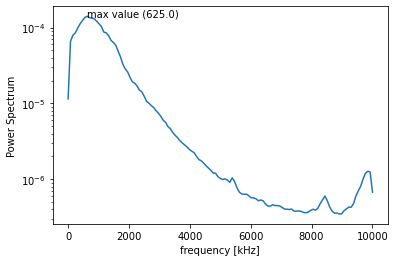


Velocity:  8.902166216
Max Frequency value:  781.25


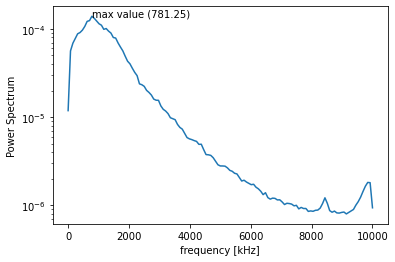


Velocity:  9.769803268
Max Frequency value:  937.5


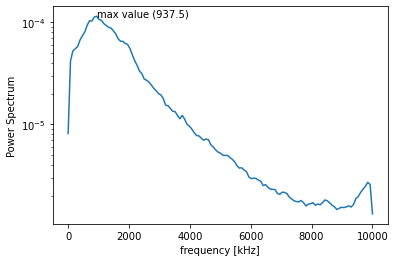


Velocity:  10.756487176
Max Frequency value:  1015.625


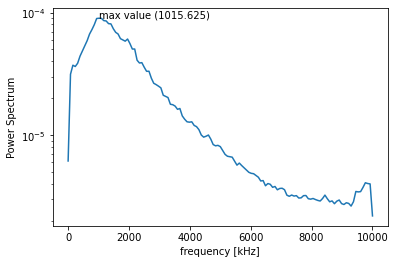


Velocity:  11.731568696000002
Max Frequency value:  1093.75


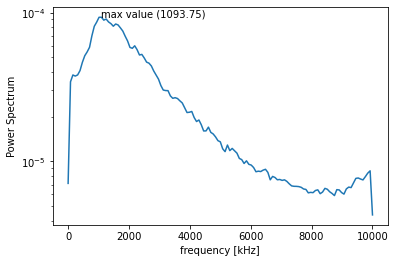


Velocity:  12.67408452
Max Frequency value:  1250.0


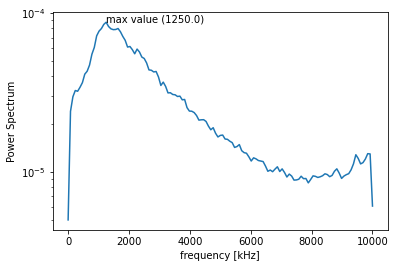


Velocity:  13.593962376000002
Max Frequency value:  1484.375


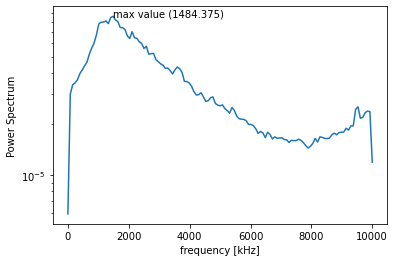


Velocity:  14.367217308
Max Frequency value:  1328.125


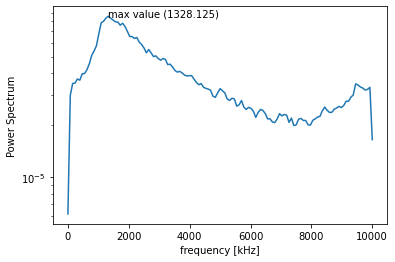

In [20]:
df6 = pd.read_csv(path_mat + ustream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

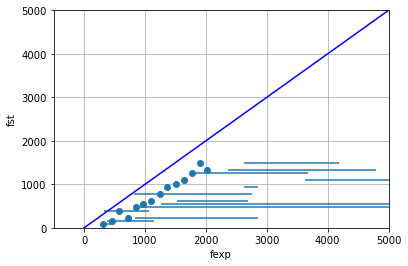

In [21]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  1.0557486040000001
Max Frequency value:  9843.75


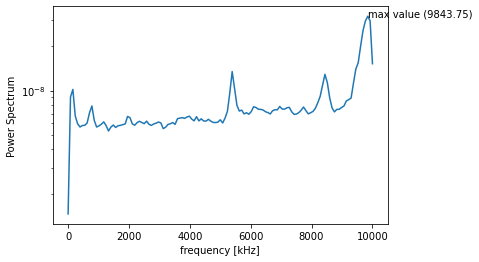


Velocity:  1.419115472
Max Frequency value:  9843.75


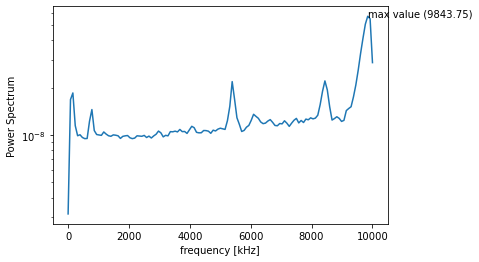


Velocity:  2.340212824
Max Frequency value:  78.125


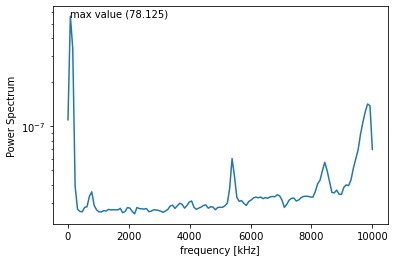


Velocity:  3.2775157320000003
Max Frequency value:  234.375


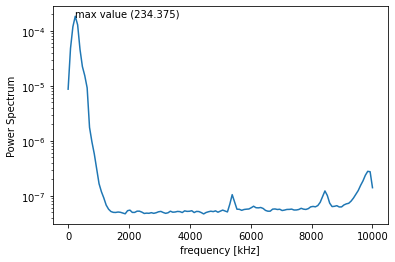


Velocity:  4.275226632
Max Frequency value:  390.625


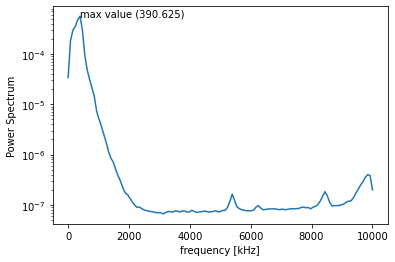


Velocity:  5.183570804
Max Frequency value:  390.625


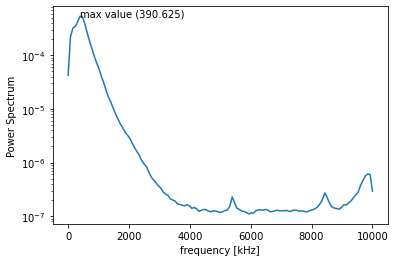


Velocity:  6.080982452
Max Frequency value:  546.875


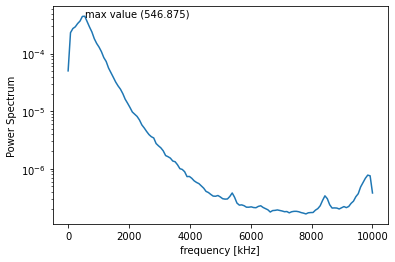


Velocity:  7.091506648
Max Frequency value:  546.875


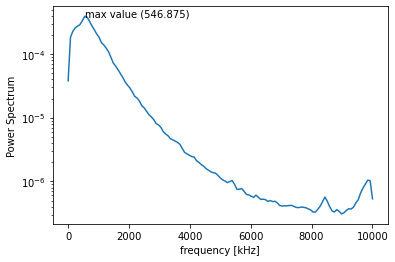


Velocity:  7.849904339999999
Max Frequency value:  625.0


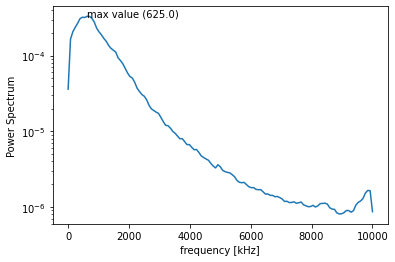


Velocity:  8.876883144
Max Frequency value:  625.0


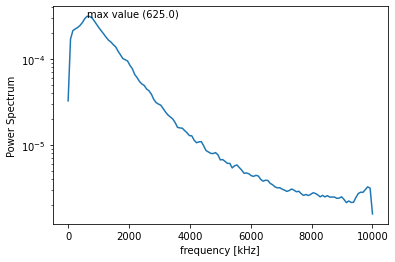


Velocity:  9.8302542
Max Frequency value:  781.25


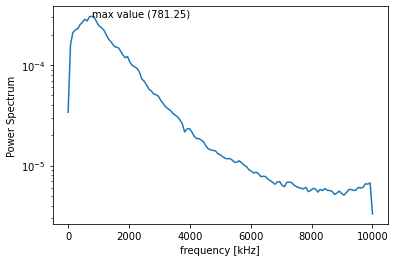


Velocity:  10.757260096
Max Frequency value:  781.25


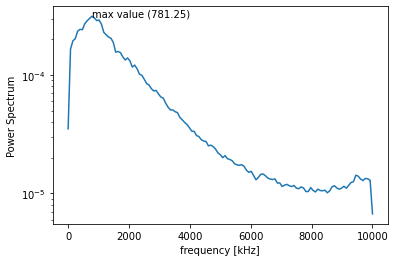


Velocity:  11.716539696000002
Max Frequency value:  781.25


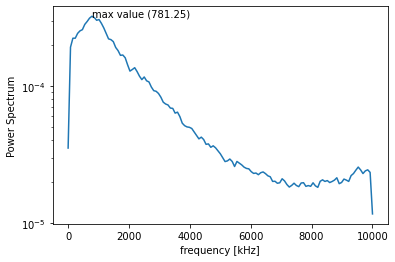


Velocity:  12.6488358
Max Frequency value:  1015.625


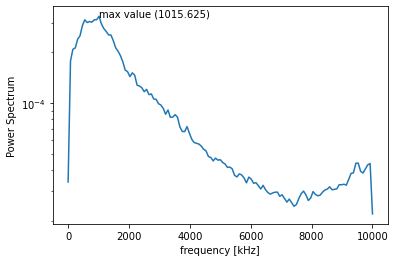


Velocity:  13.571478992
Max Frequency value:  1015.625


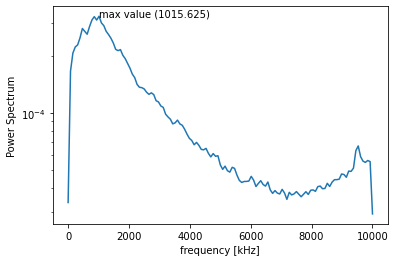


Velocity:  14.495925663999998
Max Frequency value:  1171.875


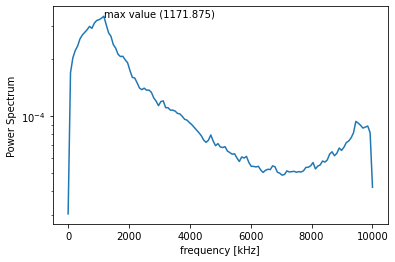

In [22]:
df7 = pd.read_csv(path_mat + ustream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

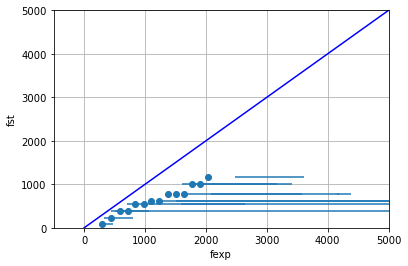

In [23]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  1.05812748
Max Frequency value:  9843.75


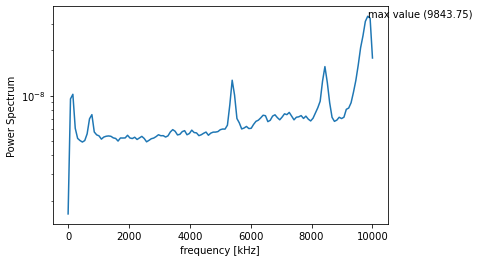


Velocity:  1.396760908
Max Frequency value:  9843.75


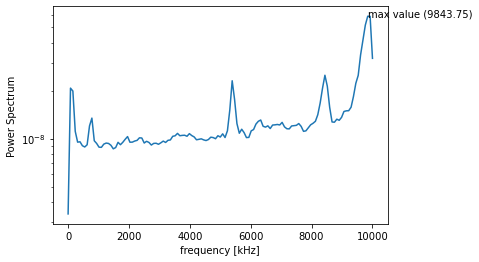


Velocity:  2.3719283079999998
Max Frequency value:  9843.75


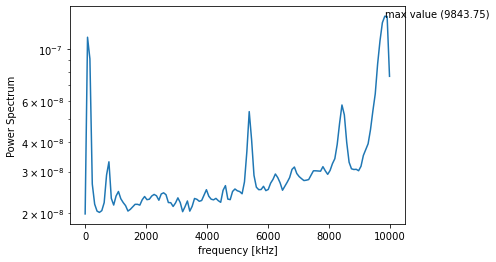


Velocity:  3.3188669520000005
Max Frequency value:  234.375


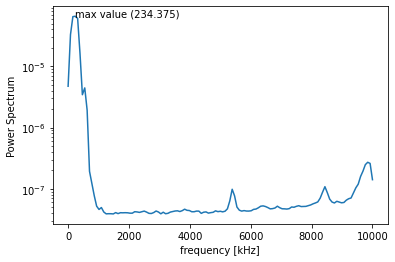


Velocity:  4.224471552
Max Frequency value:  390.625


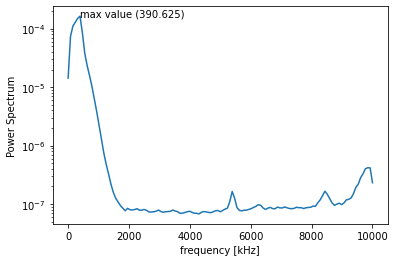


Velocity:  5.1749141000000005
Max Frequency value:  390.625


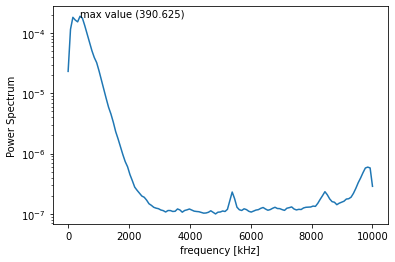


Velocity:  6.12981382
Max Frequency value:  234.375


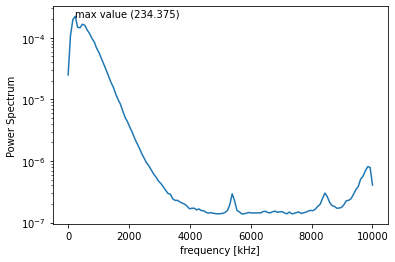


Velocity:  7.023266400000001
Max Frequency value:  546.875


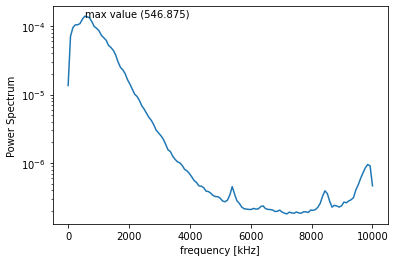


Velocity:  7.894536176
Max Frequency value:  625.0


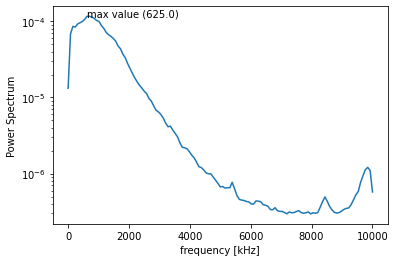


Velocity:  8.8941622
Max Frequency value:  859.375


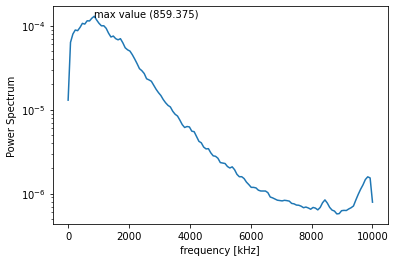


Velocity:  9.764143776
Max Frequency value:  859.375


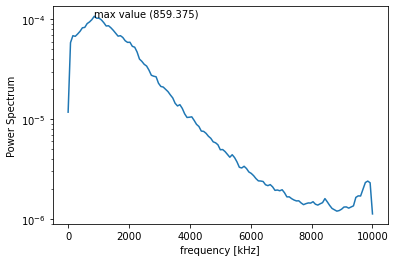


Velocity:  10.755087331999999
Max Frequency value:  937.5


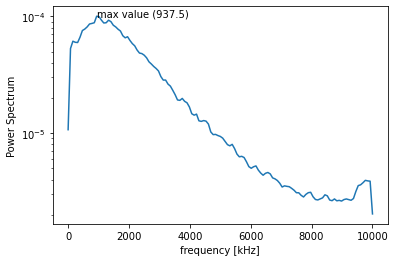


Velocity:  11.734660376
Max Frequency value:  1093.75


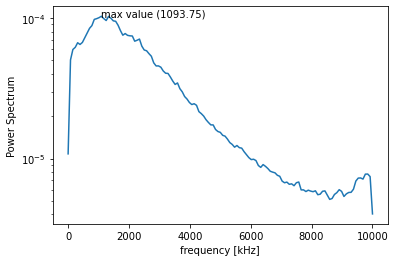


Velocity:  12.69984852
Max Frequency value:  1328.125


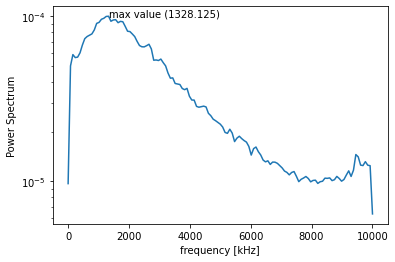


Velocity:  13.672662808
Max Frequency value:  1093.75


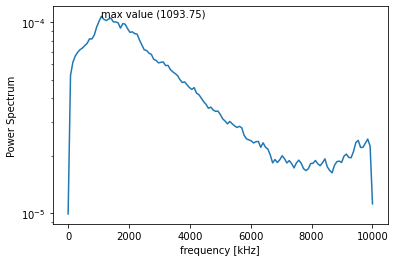


Velocity:  14.367930111999998
Max Frequency value:  1328.125


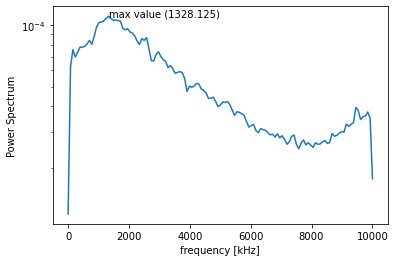

In [24]:
df8 = pd.read_csv(path_mat + ustream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

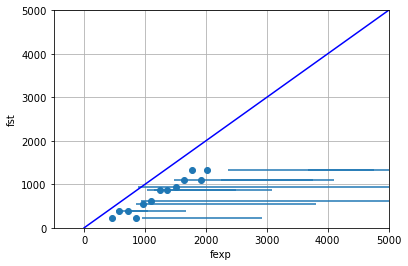

In [25]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.8833445039999999
Max Frequency value:  9843.75


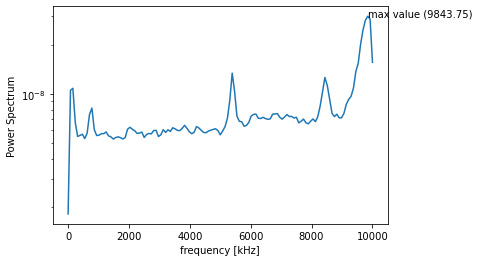


Velocity:  1.386206256
Max Frequency value:  9843.75


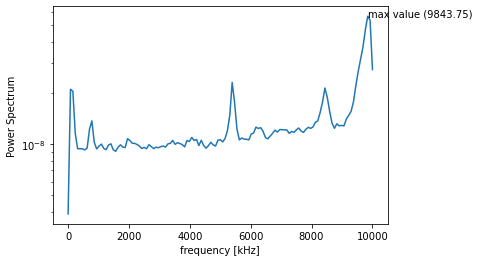


Velocity:  2.3626103279999997
Max Frequency value:  78.125


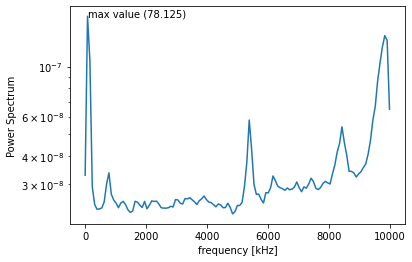


Velocity:  3.2893843479999996
Max Frequency value:  156.25


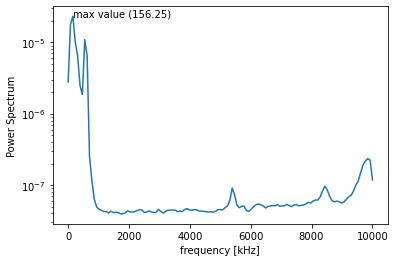


Velocity:  4.235704655999999
Max Frequency value:  156.25


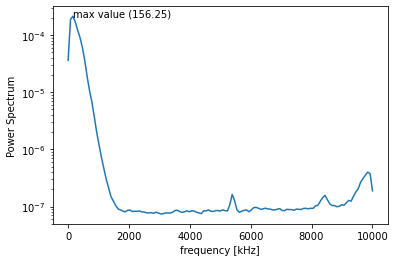


Velocity:  5.235193272000001
Max Frequency value:  156.25


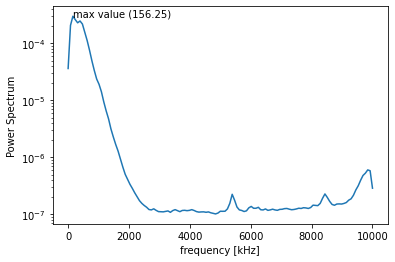


Velocity:  6.091142056
Max Frequency value:  156.25


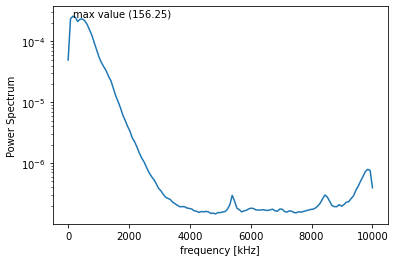


Velocity:  6.982782568
Max Frequency value:  625.0


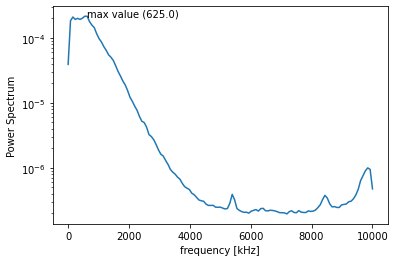


Velocity:  7.910844788
Max Frequency value:  234.375


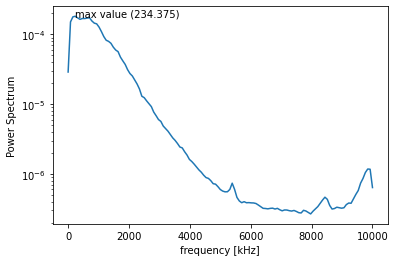


Velocity:  8.883410024
Max Frequency value:  156.25


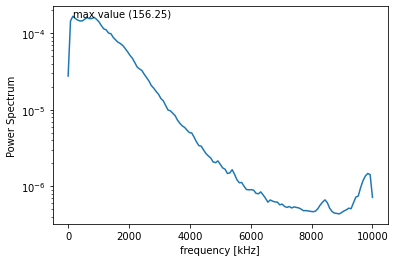


Velocity:  9.765577971999999
Max Frequency value:  859.375


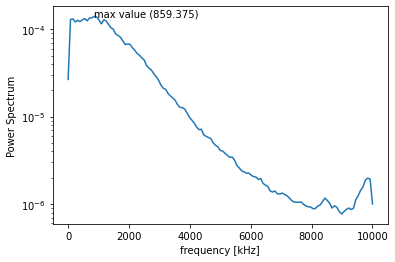


Velocity:  10.739749164000001
Max Frequency value:  1093.75


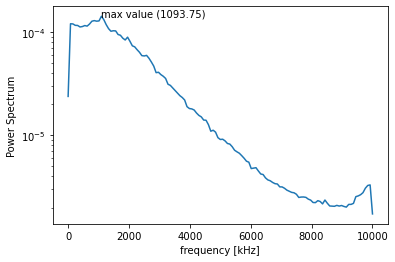


Velocity:  11.701948684
Max Frequency value:  1171.875


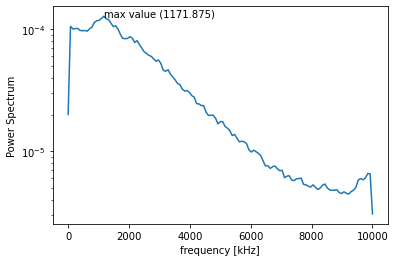


Velocity:  12.656547824
Max Frequency value:  1406.25


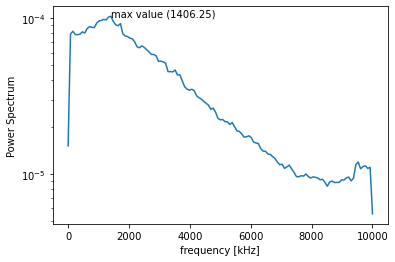


Velocity:  13.681585740000001
Max Frequency value:  1328.125


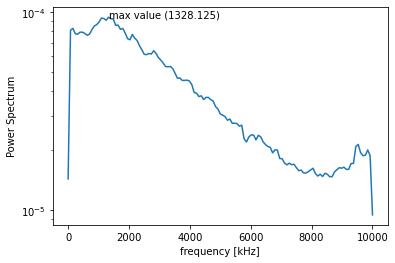


Velocity:  14.439502503999998
Max Frequency value:  1484.375


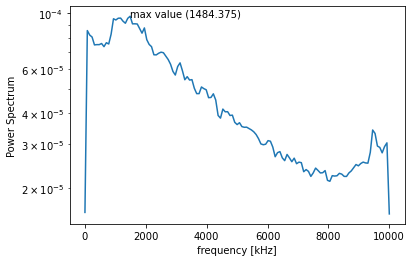

In [26]:
df9 = pd.read_csv(path_mat + ustream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

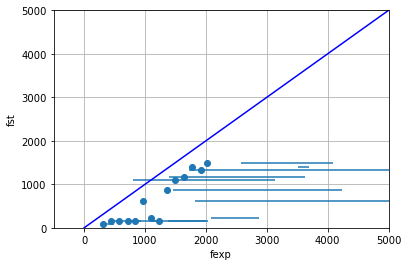

In [27]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  1.0203574560000002
Max Frequency value:  9843.75


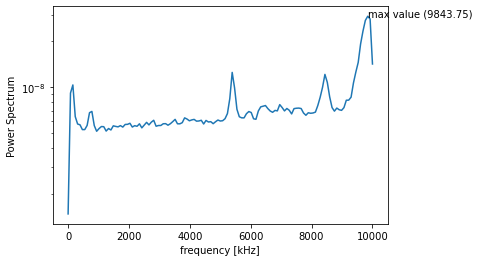


Velocity:  1.3800486600000001
Max Frequency value:  9843.75


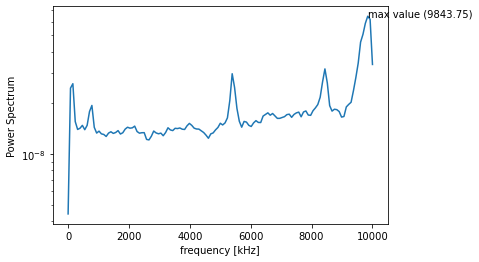


Velocity:  2.3925824479999998
Max Frequency value:  9843.75


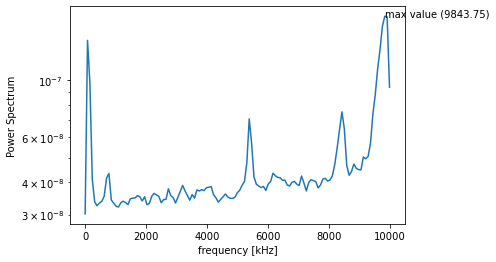


Velocity:  3.3052034440000004
Max Frequency value:  234.375


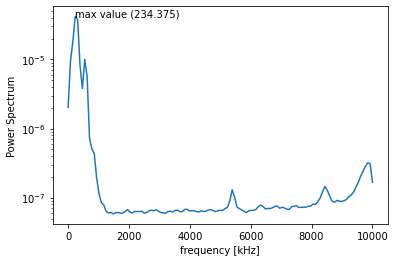


Velocity:  4.231445008
Max Frequency value:  390.625


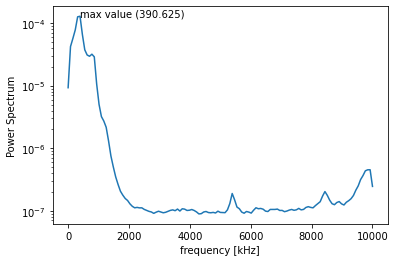


Velocity:  5.177997192
Max Frequency value:  234.375


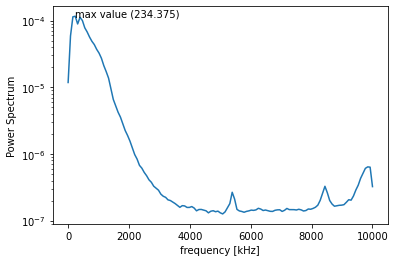


Velocity:  6.1224624919999995
Max Frequency value:  156.25


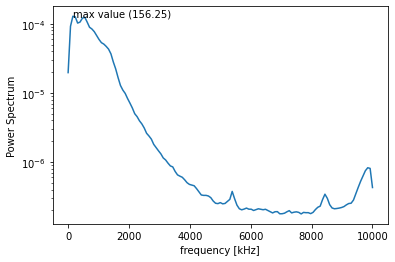


Velocity:  7.0248465919999985
Max Frequency value:  546.875


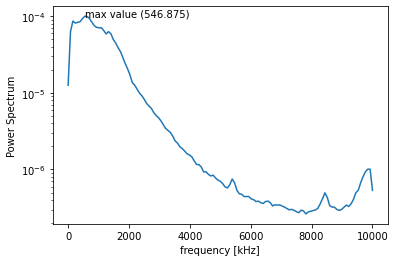


Velocity:  7.938438032
Max Frequency value:  703.125


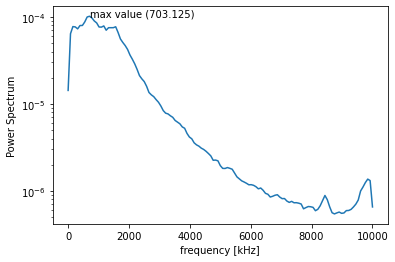


Velocity:  8.904673912
Max Frequency value:  859.375


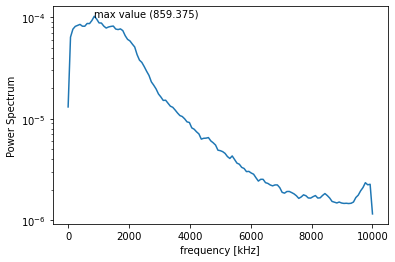


Velocity:  9.746744488000001
Max Frequency value:  937.5


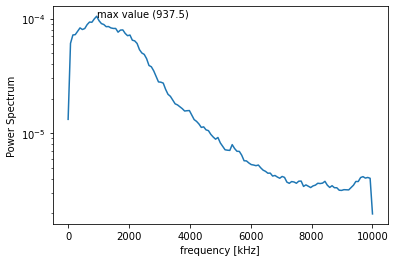


Velocity:  10.821077524
Max Frequency value:  1015.625


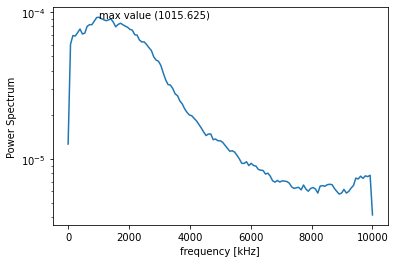


Velocity:  11.669425928
Max Frequency value:  1093.75


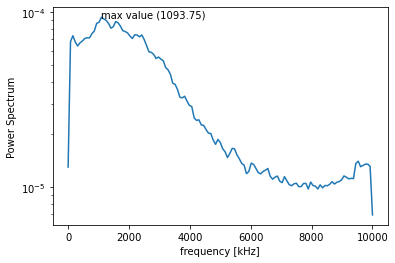


Velocity:  12.62706522
Max Frequency value:  1406.25


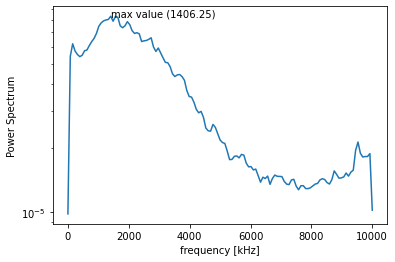


Velocity:  13.542108032
Max Frequency value:  1875.0


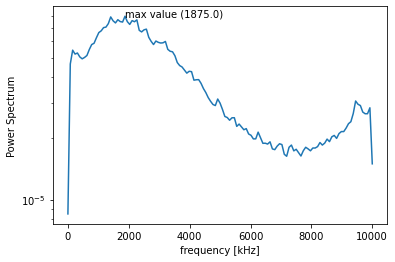


Velocity:  14.488685980000001
Max Frequency value:  2265.625


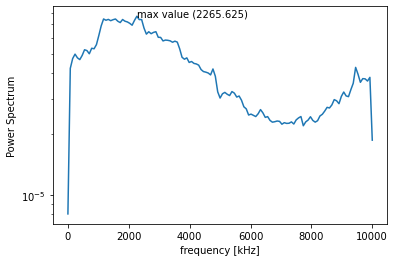

In [28]:
df10 = pd.read_csv(path_mat + ustream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

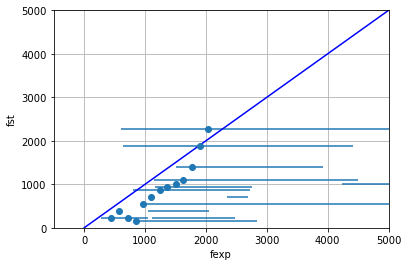

In [29]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  1.034948468
Max Frequency value:  9843.75


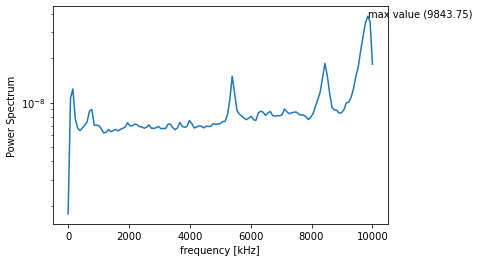


Velocity:  1.383604092
Max Frequency value:  9843.75


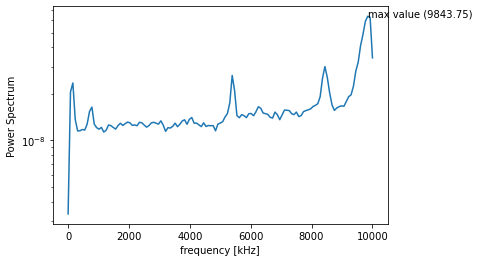


Velocity:  2.366303168
Max Frequency value:  78.125


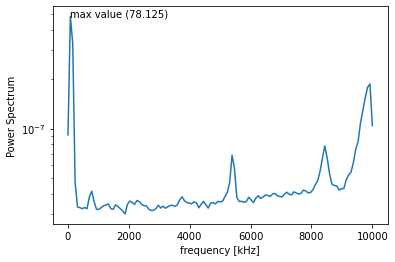


Velocity:  3.3292756079999997
Max Frequency value:  546.875


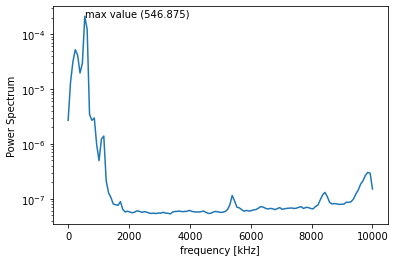


Velocity:  4.296396052
Max Frequency value:  390.625


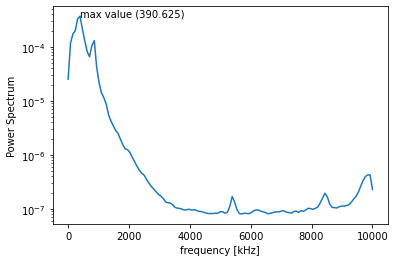


Velocity:  5.213147876
Max Frequency value:  390.625


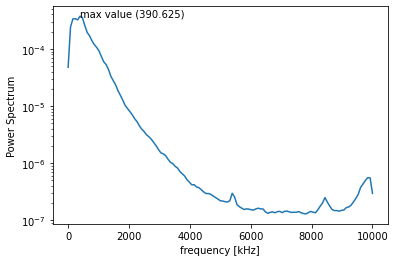


Velocity:  6.082768756
Max Frequency value:  156.25


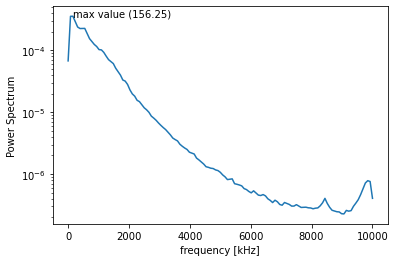


Velocity:  6.999022476
Max Frequency value:  156.25


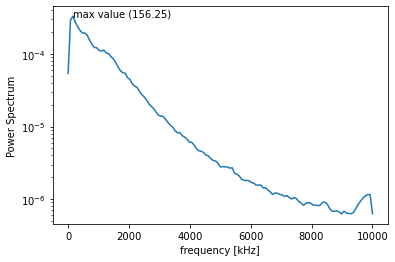


Velocity:  7.917637896
Max Frequency value:  156.25


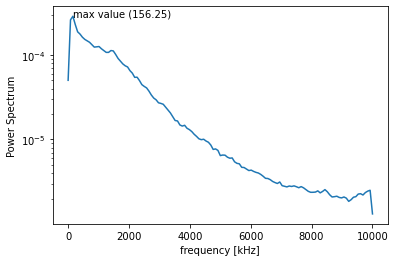


Velocity:  8.903445828
Max Frequency value:  156.25


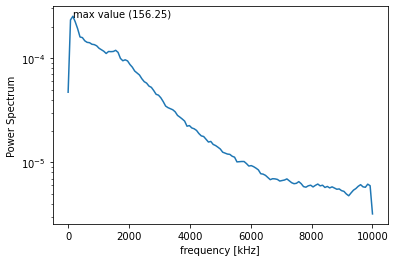


Velocity:  9.779825464000002
Max Frequency value:  156.25


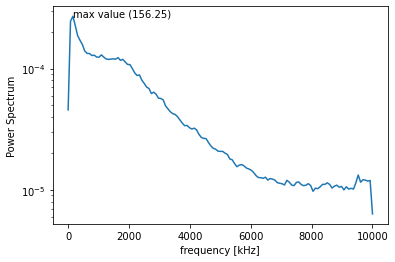


Velocity:  10.780885684000001
Max Frequency value:  156.25


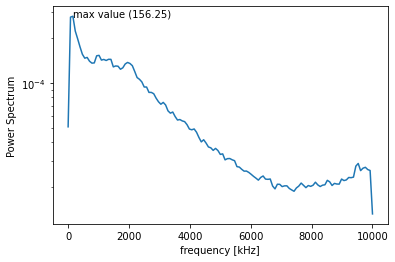


Velocity:  11.71557784
Max Frequency value:  156.25


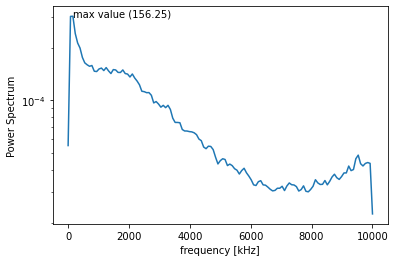


Velocity:  12.61697432
Max Frequency value:  156.25


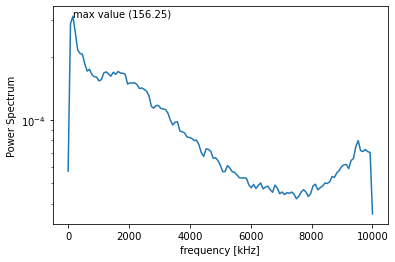


Velocity:  13.640122876000001
Max Frequency value:  156.25


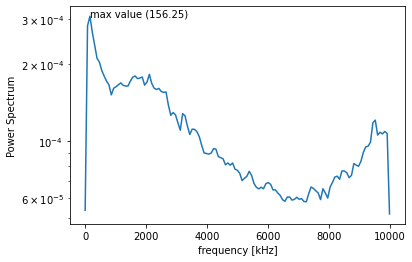


Velocity:  14.356482308000002
Max Frequency value:  156.25


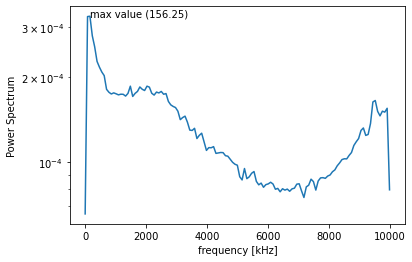

In [30]:
df11 = pd.read_csv(path_mat + ustream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

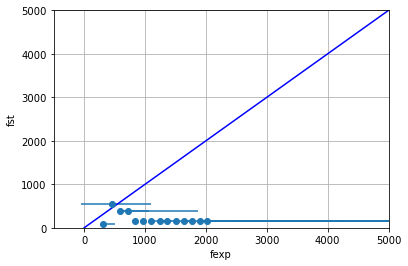

In [31]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

Velocity:  0.9008726119999999
Max Frequency value:  9843.75


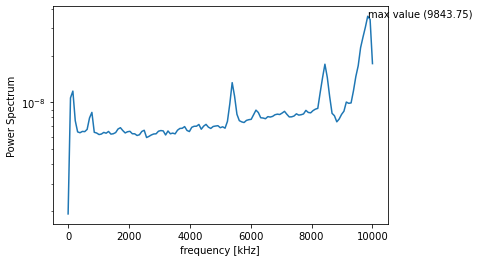


Velocity:  1.387116584
Max Frequency value:  9843.75


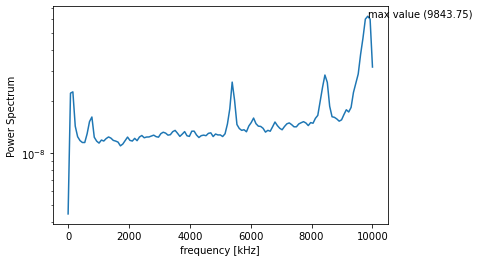


Velocity:  2.341183268
Max Frequency value:  78.125


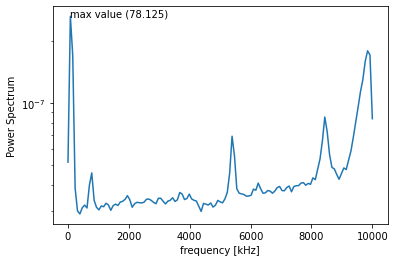


Velocity:  3.28044424
Max Frequency value:  156.25


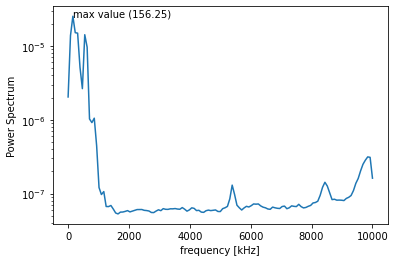


Velocity:  4.232784735999999
Max Frequency value:  390.625


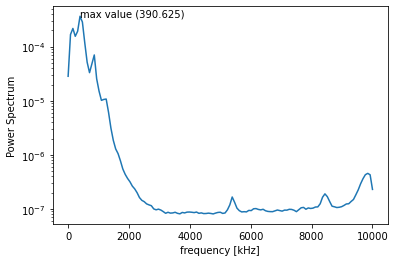


Velocity:  5.163844168
Max Frequency value:  156.25


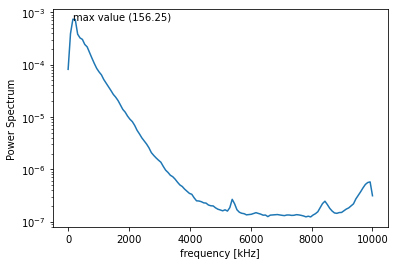


Velocity:  6.109752252
Max Frequency value:  156.25


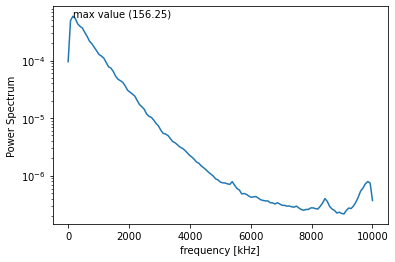


Velocity:  6.991739851999999
Max Frequency value:  156.25


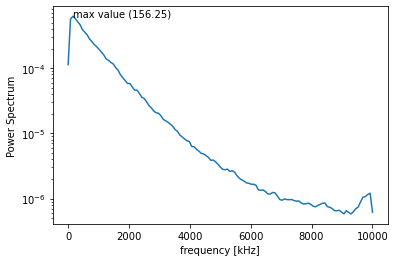


Velocity:  7.9029094760000005
Max Frequency value:  156.25


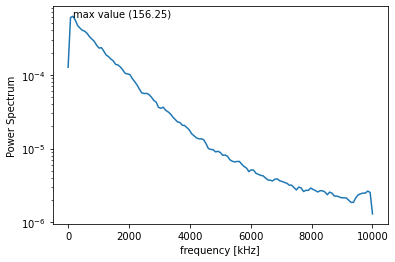


Velocity:  8.78900214
Max Frequency value:  156.25


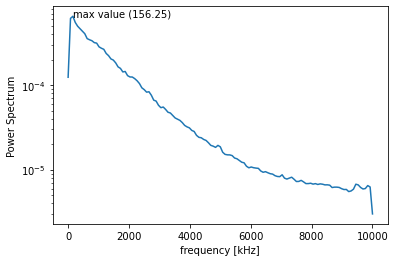


Velocity:  9.797078756
Max Frequency value:  156.25


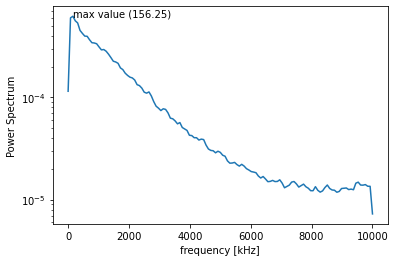


Velocity:  10.71773812
Max Frequency value:  78.125


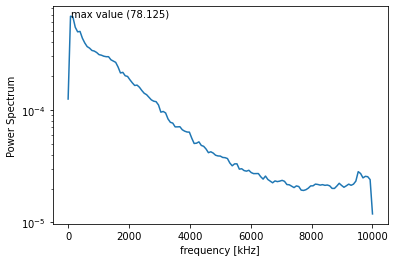


Velocity:  11.725050404
Max Frequency value:  156.25


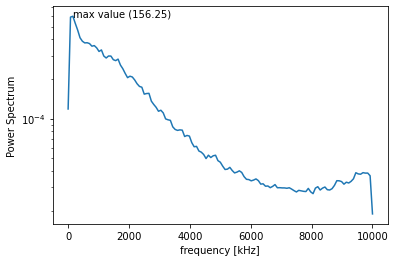


Velocity:  12.660601360000001
Max Frequency value:  156.25


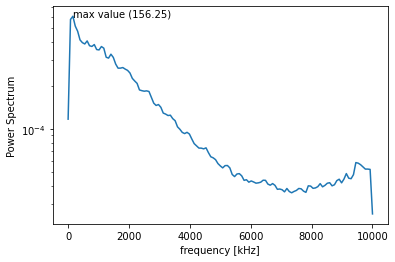


Velocity:  13.63572582
Max Frequency value:  156.25


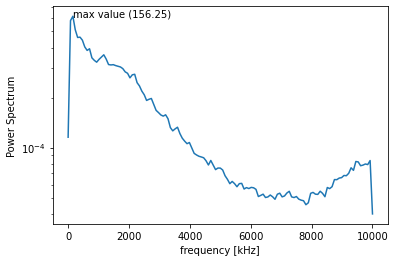


Velocity:  14.382658531999999
Max Frequency value:  156.25


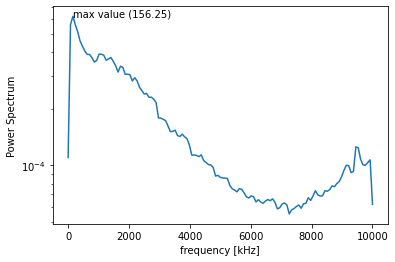

In [32]:
df12 = pd.read_csv(path_mat + ustream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

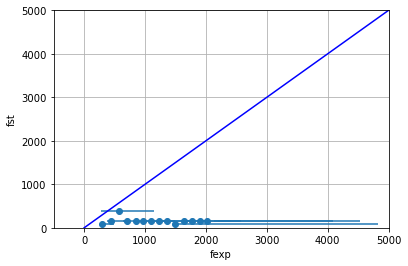

In [33]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')